### Plot Spectrogram

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Figures appear in notebook inline
%matplotlib inline


### Functions

In [130]:
def plot_spectrogram(y, ylim):
    """Plot the linear-frequency power spectrogram"""

    D = librosa.stft(y, n_fft=N_FFT, hop_length=HOP_LENGTH, win_length=WIN_LENGTH, window='hann')  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)    # STFT in dB
    
    # Plot
    librosa.display.specshow(S_db, sr=SR, hop_length=HOP_LENGTH, x_axis='s', y_axis='linear')
    plt.colorbar(format="%+2.f dB")
    plt.title('Linear-frequency Power Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(ylim)
    

### Read .wav audio

In [125]:
# File path to .wav file
audio_file_path = "../data/humpback.wav"
filename = audio_file_path.split('/')[-1]

# Read entire mono .wav file using default sampling rate
y, SR = librosa.load(audio_file_path, sr=None, mono=True, offset=0.0, duration=None)
print(f'Loaded file: {filename}\n' + '-'*30 + f'\nDuration: {y.size/SR} seconds\n' + '-'*30 + f'\nSample rate: {SR} Hz\n' + '-'*30)


Loaded file: humpback.wav
------------------------------
Duration: 255.65 seconds
------------------------------
Sample rate: 4000 Hz
------------------------------


### Plot a linear-frequency power spectrogram

Frequency resolution 15.6 Hz per bin
Time resolution 64.0 ms



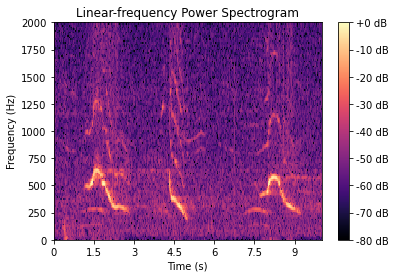

In [140]:
# CONSTANTS
N_FFT = 256
WIN_LENGTH = N_FFT
HOP_LENGTH = N_FFT//4    # default is window_size//4
N_MELS = 32

# Select a slice of the audio (seconds)
t_start = 155
t_end = 165

# Select y axis limits
ylim = [0, 2000]

plot_spectrogram(y[SR*t_start:SR*t_end], ylim)

print(f'Frequency resolution {SR/N_FFT:.1f} Hz per bin')
print(f'Time resolution {1000*N_FFT/SR:.1f} ms\n')
